In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car=pd.read_csv("car")

In [3]:
car.head()

,buying,maint,doors,person,lug_boot,safety,class_value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
car.tail()

,buying,maint,doors,person,lug_boot,safety,class_value
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [5]:
car.isnull().sum()

buying         0
maint          0
doors          0
person         0
lug_boot       0
safety         0
class_value    0
dtype: int64

In [6]:
car.shape

(1728, 7)

In [7]:
car.dtypes

buying         object
maint          object
doors          object
person         object
lug_boot       object
safety         object
class_value    object
dtype: object

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying         1728 non-null object
maint          1728 non-null object
doors          1728 non-null object
person         1728 non-null object
lug_boot       1728 non-null object
safety         1728 non-null object
class_value    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


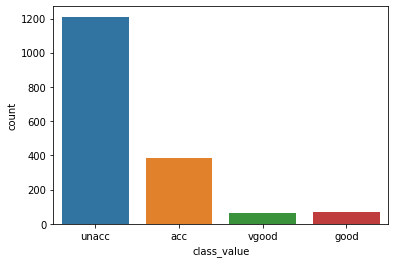

In [9]:
sns.countplot(car['class_value'])

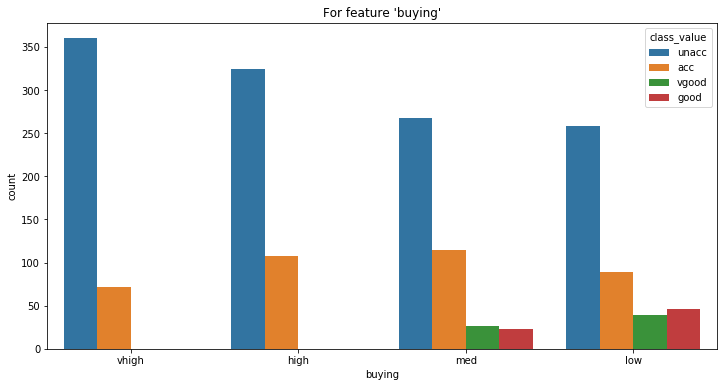

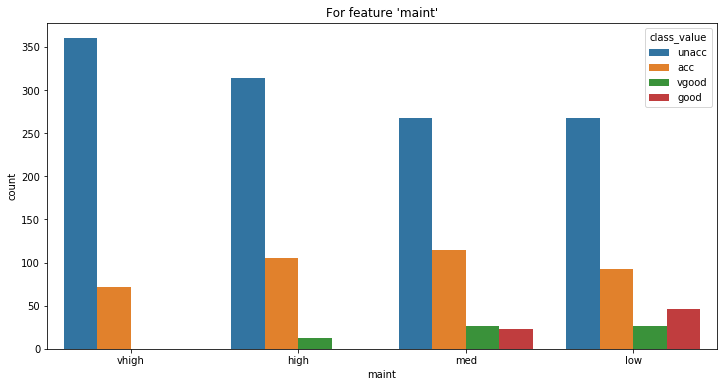

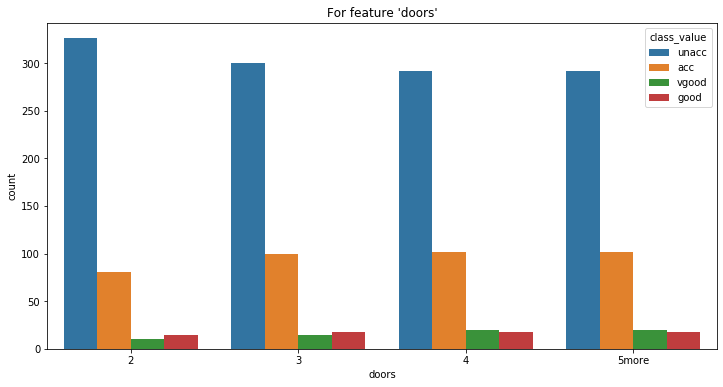

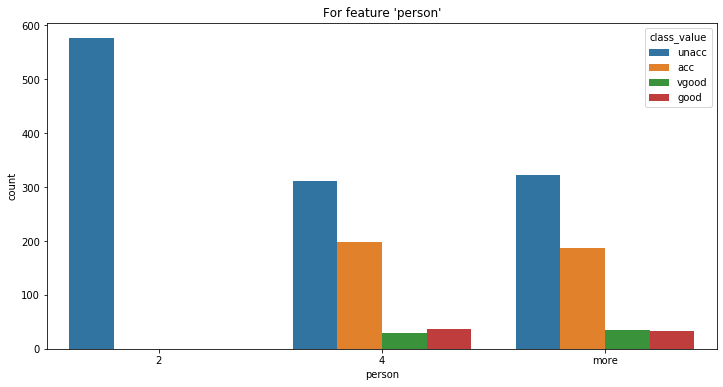

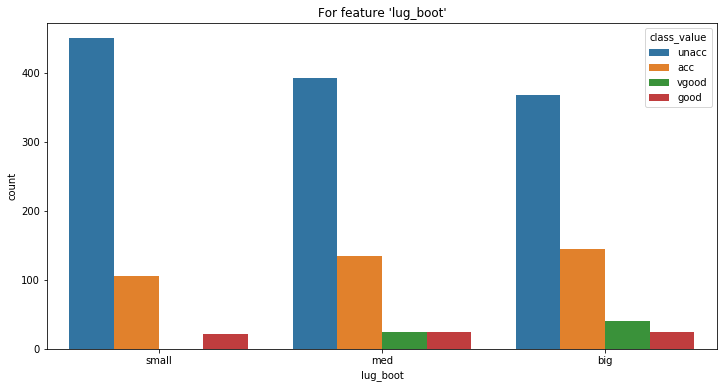

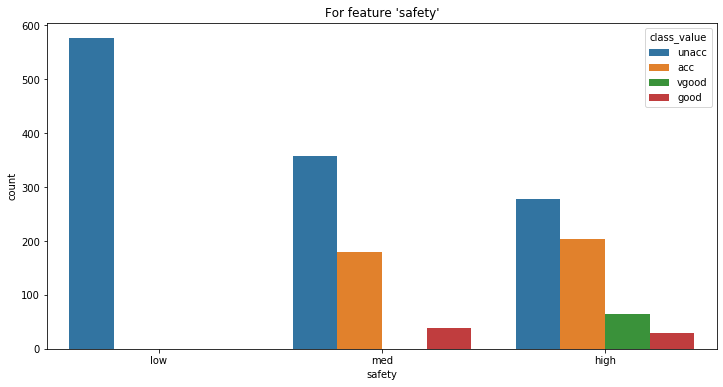

In [10]:
for i in car.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(car[i],hue=car['class_value'])

In [11]:
car['class_value'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [12]:
label1={"unacc":0,"acc":1,"good":2,"vgood":3}
lab1=car["class_value"].map(label1)
lab1.head()

0    0
1    0
2    0
3    0
4    0
Name: class_value, dtype: int64

In [13]:
car['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [14]:
label2={"low":0,"med":1,"high":2}
lab2=car["safety"].map(label2)
lab2.head()

0    0
1    1
2    2
3    0
4    1
Name: safety, dtype: int64

In [15]:
car['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [16]:
label3={"small":0,"med":1,"big":2}
lab3=car["lug_boot"].map(label3)
lab3.head()

0    0
1    0
2    0
3    1
4    1
Name: lug_boot, dtype: int64

In [17]:
car['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [18]:
label4={"low":0,"med":1,"high":2,"vhigh":3}
lab4=car["buying"].map(label4)
lab4.head()

0    3
1    3
2    3
3    3
4    3
Name: buying, dtype: int64

In [19]:
car['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [20]:
label5={"low":0,"med":1,"high":2,"vhigh":3}
lab5=car["maint"].map(label5)
lab5.head()

0    3
1    3
2    3
3    3
4    3
Name: maint, dtype: int64

In [21]:
car['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [22]:
label6={"2":2,"3":3,"4":4,"5more":5}
lab6=car["doors"].map(label6)
lab6.head()

0    2
1    2
2    2
3    2
4    2
Name: doors, dtype: int64

In [23]:
car['person'].unique()

array(['2', '4', 'more'], dtype=object)

In [24]:
label7={"2":2,"4":4,"more":5}
lab7=car["person"].map(label7)
lab7.head()

0    2
1    2
2    2
3    2
4    2
Name: person, dtype: int64

In [25]:
car_new=pd.concat([lab1,lab2,lab3,lab4,lab5,lab6,lab7],axis=1)

In [26]:
car_new.head(10)

,class_value,safety,lug_boot,buying,maint,doors,person
0,0,0,0,3,3,2,2
1,0,1,0,3,3,2,2
2,0,2,0,3,3,2,2
3,0,0,1,3,3,2,2
4,0,1,1,3,3,2,2
5,0,2,1,3,3,2,2
6,0,0,2,3,3,2,2
7,0,1,2,3,3,2,2
8,0,2,2,3,3,2,2
9,0,0,0,3,3,2,4


In [27]:
car_new.tail()

,class_value,safety,lug_boot,buying,maint,doors,person
1723,2,1,1,0,0,5,5
1724,3,2,1,0,0,5,5
1725,0,0,2,0,0,5,5
1726,2,1,2,0,0,5,5
1727,3,2,2,0,0,5,5


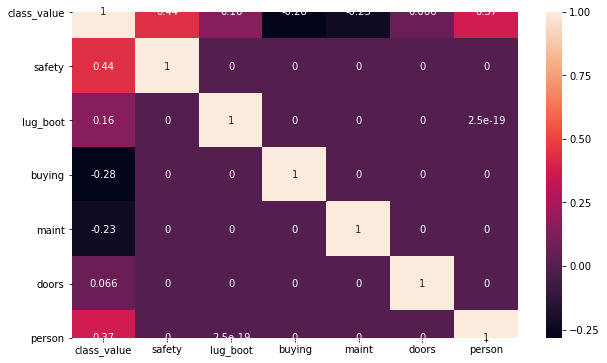

In [28]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(car_new.corr(),annot=True)

In [29]:
X= car_new.drop(['class_value'], axis = 1)
print("Shape of input columns:",X.shape)

y =car_new['class_value']
print("shape of target:",y.shape)

Shape of input columns: (1728, 6)
shape of target: (1728,)


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 52)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,auc
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [34]:
lr= LogisticRegression()
tree = DecisionTreeClassifier()
knn =  KNeighborsClassifier()
svc = SVC()
forest = RandomForestClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()

models = {lr:'LogisticRegression',
          tree:'DecisionTree',
          knn: 'KNN',
          svc: 'SVC',
          forest: 'RandomForest',
          ada: 'Adaboost',
          gnb: 'Naive'}


def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

def acc_res(y_test,y_pred):
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)

    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
        
    return accuracy_scores
    
accuracy_scores = main(models)

--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 81.2609%
Confusion Matrix
[[383  21   2   1]
 [ 32  78   2   0]
 [  3  19   1   0]
 [  0  27   0   2]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       407
           1       0.54      0.70      0.61       112
           2       0.20      0.04      0.07        23
           3       0.67      0.07      0.12        29

    accuracy                           0.81       571
   macro avg       0.58      0.44      0.43       571
weighted avg       0.80      0.81      0.79       571

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTree: 97.7233%
Confusion Matrix
[[403   2   2   0]
 [  1 108   3   0]
 [  0   1  21   1]
 [  0   1   2  26]]
Classification Report
              precisi

In [35]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = tree, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of DecisionTreeClassifier  = ", cross_validation)
print("\nCross validation mean accuracy of DecisionTreeClassifier = ", cross_validation.mean())

Cross validation accuracy of DecisionTreeClassifier  =  [0.97457627 0.99152542 0.99145299 0.96551724 0.98275862 0.99137931
 0.93859649 0.95614035 0.96491228 0.97368421]

Cross validation mean accuracy of DecisionTreeClassifier =  0.9730543192115372


I choose DecisionTreeClassifier  as my final model because it perform very well on our dataset.

Accuracy_score=97.7233%

Cross_val_score=  0.9730543192115372

In [36]:
from sklearn.externals import joblib

joblib.dump(tree,'car_new_joblib')

['car_new_joblib']